## Imports

In [1]:
import joblib # for loading and saving python objects
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import train_test_split # for splitting data
import pandas as pd #for data anlsysis
from sklearn.preprocessing import LabelEncoder #for encoding categorical features
import matplotlib.pyplot as plt #for plotting
import seaborn as sns # for data visualization

## Data Loading

In [ ]:
#load dataset from pickle file
df = joblib.load("cleaned_dataset.pkl")

## Feature Scaling

In [ ]:
#select numerical data from Dataframe
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
# fit scaler to numerical data and transform it
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## Categorical Encoding

In [21]:
# Create a LabelEncoder object
le = LabelEncoder()
# aplying label encoding
for col in ['protocol_type', 'service', 'flag']:
    df[col] = le.fit_transform(df[col])

df['binary_label'] = df['binary_label'].apply(lambda x: 1 if x != 'normal' else 0)

## Data Splitting

In [22]:
X = df.drop(['label', 'binary_label'], axis=1)
y = df['binary_label']

In [9]:
# Splitting data into Train, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

## Correlation Visualization

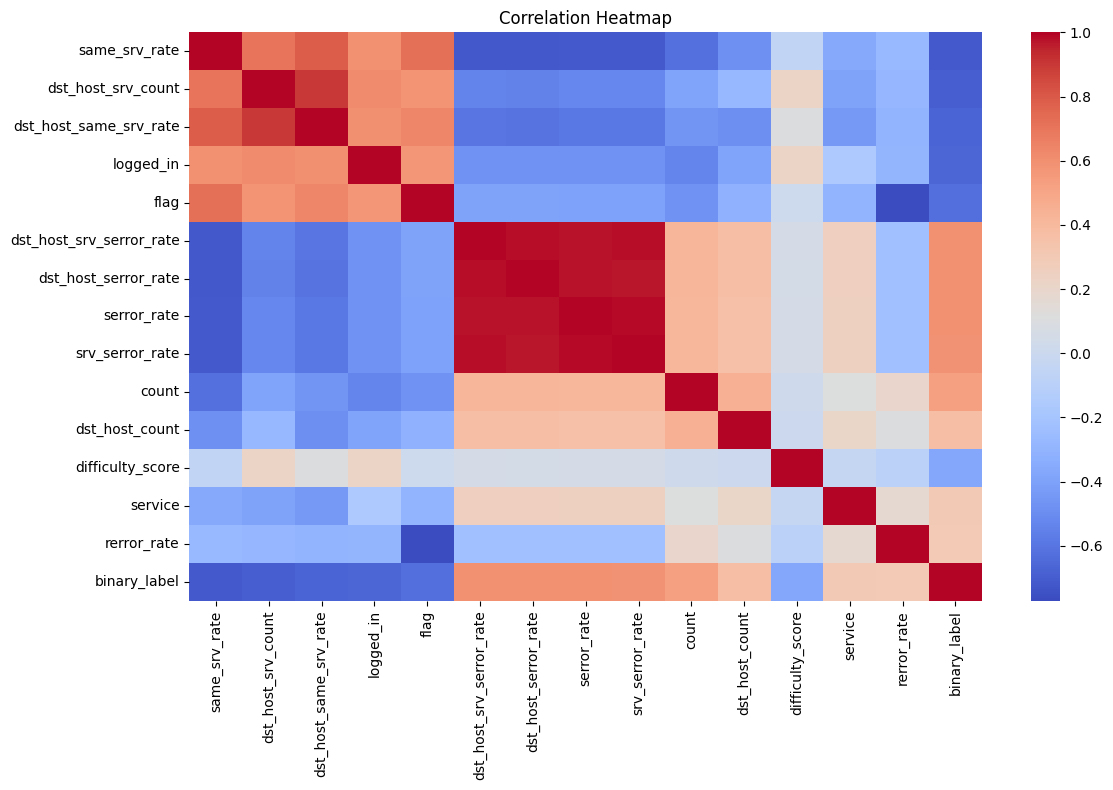

In [23]:
# Select numerical data for correlation analysis
numeric_data = X_train.select_dtypes(include=['int64', 'float64'])

# Concatenate numerical data and target variable for correlation calculation
corr_df = pd.concat([numeric_data.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
correlation_matrix = corr_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Correlation Calculation

In [24]:
target_col = 'binary_label'

correlation_matrix = corr_df.corr() # Calculate the correlation matrix

# Calculate absolute correlations with the target and sort in descending order
target_corr = correlation_matrix[target_col].drop(target_col).abs().sort_values(ascending=False)

print("Absolute Correlations with Target:")
print(target_corr)

Absolute Correlations with Target:
same_srv_rate               0.712070
dst_host_srv_count          0.695342
dst_host_same_srv_rate      0.671967
logged_in                   0.663771
flag                        0.632116
dst_host_srv_serror_rate    0.597720
dst_host_serror_rate        0.593851
serror_rate                 0.592617
srv_serror_rate             0.590734
count                       0.526102
dst_host_count              0.375662
difficulty_score            0.375559
service                     0.301661
rerror_rate                 0.300337
Name: binary_label, dtype: float64


## Feature Selection

In [25]:
#  correlation threshold
threshold = 0.3
# Select features with absolute correlation greater than the threshold
selected_features = target_corr[target_corr > threshold].index.tolist()

if target_col in selected_features:
    selected_features.remove(target_col)

print(f"Selected {len(selected_features)} features with abs(correlation) > {threshold}:")
print(selected_features)

Selected 14 features with abs(correlation) > 0.3:
['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'count', 'dst_host_count', 'difficulty_score', 'service', 'rerror_rate']


In [26]:
selected_features

['same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'logged_in',
 'flag',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'count',
 'dst_host_count',
 'difficulty_score',
 'service',
 'rerror_rate']

## Data Subsetting

In [27]:
# Select only the selected features for training, validation, and testing
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

## Data Saving

In [28]:
# Create a dictionary containing the data splits
data_splits = {
    "Full_data": df,
    "X_train": X_train,
    "X_val": X_val,
    "X_test": X_test,
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test
}

joblib.dump(data_splits, "data_splits.pkl")

['data_splits.pkl']